<a href="https://colab.research.google.com/github/joliebao/TCS-Data-Science-Obesity/blob/main/TCS_DataScience_Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **Obesity Data Set**


---




Obesity is a growing global health issue that affects people of all ages and backgrounds. Understanding the relationship between daily habits—such as diet and physical activity—and obesity levels can help identify patterns that contribute to weight gain. This project uses a publicly available dataset on obesity levels based on eating habits and physical condition to explore these patterns through data analysis.

By applying data science techniques such as data cleaning, visualization, and classification, this project aims to uncover how specific behaviors influence body weight categories. The goal is to develop insights that may inform healthier lifestyle choices for teens and young adults. Ultimately, this research demonstrates how data science can be used to address real-world health challenges.



**Key Columns:**

  + Gender: Biological sex of the individual

  + Age: Age in years

  + Height: Height in meters

  + Weight: Weight in kilograms

  + Family_history_with_overweight: Overweight in immediate family

  + FAVC: Eats high-calorie foods frequently

  + FCVC: Frequency of vegetable consumption

  + NCP: Number of daily main meals

  + CAEC: Eats between meals

  + SMOKE: Smokes regularly

  + CH2O: Daily water intake

  + SCC: Monitors daily calorie intake

  + FAF: Weekly physical activity frequency

  + TUE: Daily screen time usage

  + CALC: Alcohol consumption frequency

  + MTRANS: Main transportation method

  + NObeyesdad: Obesity classification label


***Importing***

In [2]:
#importing libraries and cloning repo

!git clone https://github.com/joliebao/TCS-Data-Science-Obesity

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

Cloning into 'TCS-Data-Science-Obesity'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 125.29 KiB | 1.67 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
# convert downloaded dataset into accessible dataset
url = 'https://raw.githubusercontent.com/joliebao/TCS-Data-Science-Obesity/refs/heads/main/ObesityDataSet.csv'
df = pd.read_csv(url)



---


***Research/Literature Review***

*Pre-Dataset Exploration*:
+ Sources - https://www.semanticscholar.org/reader/f3cec32ad3afdc60376a26165c81acc5e6536c4d
https://pmc.ncbi.nlm.nih.gov/articles/PMC7484407/
https://link.springer.com/article/10.1007/s10995-018-02696-y


Obesity is classified as an abnormal accumulation of fat. It is sometimes considered an eating disorder.

Causes:


*   Eating habits
*   Unhealthy lifestyle



Effects:

*   Increased vulnerability to illness
*   Reduced immunity
*   Sensory changes
*   Decreased productivity
*   Increased cardiovascular conditions
*   Metabolic abnormalities
*   Increased chance of developing chronic diseases

Demographics:


*   Mostly found in minority groups (ex. ethnic/racial minorities, women, and lower class).
*   It has been found that these demographics are consistent with minorities because of stress and unfair treatment received by society.
*   It has also been linked to food insecurity from youth.
*   Obesity linked to alcohol consumption
*   Obesity linked with calorie dense food consumption
*   Children experience obesity from direct interaction with family as they build the same habits


***Basic Dataset Exploration***

** Note: The Dataset has already been cleaned and filtered (?)

In [4]:
df.shape            # 17 categories, 2111 entries

(2111, 17)

In [25]:
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [6]:
df.info()         # all filled out! (all non-null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.isna()             # again all filled out! (all non-null)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


***Research Question***

*How do living conditions affect obesity?*
- family_history_with_overweight
- SMOKE
- FAF
- TUE
- CALC
- MTRANS

*What factors are most important to diagnosing obesity?*
- Test all categories

*Which habits are most related to obesity?*
- FAVC
- FCVC
- CAEC
- CH20
- SCC
- FAF
- TUE
- CALC
- MTRANS

These smaller questions can create this better developed question:

***Which lifestyle and living conditions are most strongly associated with obesity and how can interpretable models be used to predict an individuals obesity level?***

***Data Cleaning***

The data set is tested to be as fair and as consistent as possible.

In [30]:
# GETTING RID OF DUPLICATES
print(df.duplicated().sum()) # Because there were 24 duplicates, they needed to
                             # be removed.
df = df.drop_duplicates()

24


In [32]:
df.shape  # the duplicates were properly removed!

(2087, 17)

In [33]:
# CHECKING VARIANCE OF OBESITY CLASSIFICATIONS
print((df['NObeyesdad'] == 'Normal_Weight').sum())
print((df['NObeyesdad'] == 'Overweight_Level_I').sum())
print((df['NObeyesdad'] == 'Overweight_Level_II').sum())
print((df['NObeyesdad'] == 'Obesity_Type_I').sum())
print((df['NObeyesdad'] == 'Obesity_Type_II').sum())
print((df['NObeyesdad'] == 'Obesity_Type_III').sum())
print((df['NObeyesdad'] == 'Insufficient_Weight').sum())

# Based on these results, the data set is well spread out; containing similarly
# proportional data from various weight groups

282
276
290
351
297
324
267


In [34]:
# CHECKING VARIANCE OF GENDER
print((df['Gender'] == 'Female').sum())

# Gender is also proportional! (Data set has 2087 entries)

1035


In [46]:
def box_Plot(col, plot_title, x_label):
    data = df[col]
    plt.boxplot(data, vert = False)
    plt.xlabel(x_label)
    plt.title(plot_title)

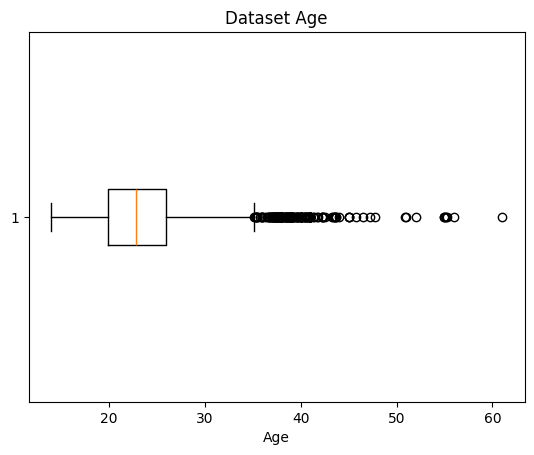

In [47]:
# CHECKING FOR OUTLIERS
box_Plot('Age', "Dataset Age", "Age")

# Age is reasonable
# A lot of outliers
# Dataset does not include early adolescents and children

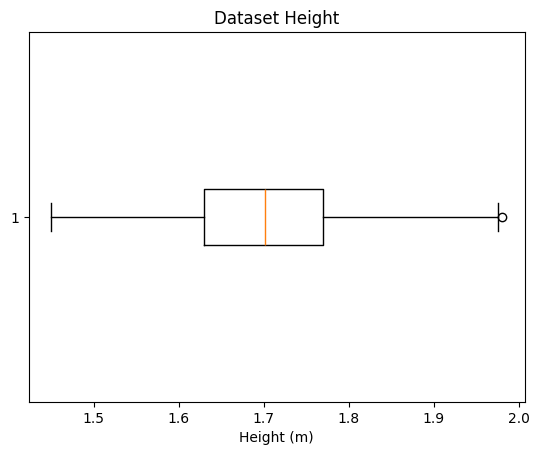

In [48]:
# CHECKING FOR OUTLIERS
box_Plot('Height', 'Dataset Height', 'Height (m)')

# One outlier, but a possible height

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Name: Weight, Length: 2087, dtype: bool>


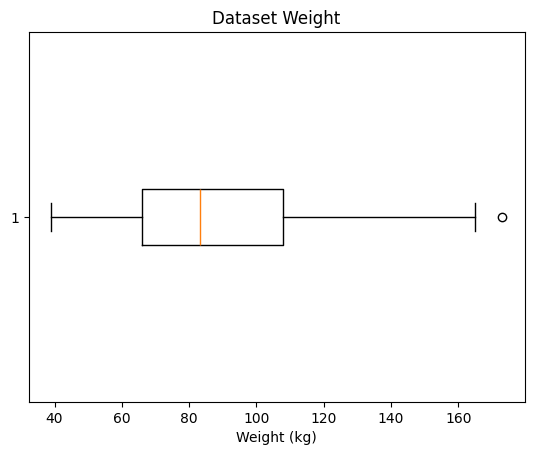

In [52]:
# CHECKING FOR OUTLIERS
box_Plot('Weight', 'Dataset Weight', 'Weight (kg)')

# one outlier, but a possible weight



---


***Categorical Data Encoding***

Numeric data is easier to be measured and visualized than categorical data.

In [ ]:
# I think only NObeyesdad should be encoded for bar graphs
# bar graphs = 1 categorical x, 1 numerical y
#

***Visualizations + Diagrams***

*Possible Relations*
NObeyesdad with every other category of data!
- They all seem related so all of them are worth trying out







In [10]:
y = df['NObeyesdad']

In [53]:
def bar_Plot(x_value, plot_title, x_label):
    x = x_value.value_counts
    plt.bar(x_value, y)
    plt.xlabel(x_label)
    plt.ylabel("Obesity")
    plt.xticks(rotation = 90)
    plt.title(plot_title)
    plt.show()

***Modeling***

*Possible Relations*

***Scaling***

Before modeling these relationships, it is also necessary for these numeric values to be scaled to appropriate and similar values.

In [12]:
# Suggestions of number of models to test (FOR ML MODELS) -----
# 1 supervised
# 1 unsupervised

# Recommended Model -----
# SVM Models
# Nearest Neighbors